<a href="https://colab.research.google.com/github/JunYoung07/Python_AI_Project/blob/main/5_%EC%87%BC%ED%95%91%EB%AA%B0_%EA%B3%A0%EA%B0%9D%EC%A3%BC%EB%AC%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 고객 주문 데이터 파악하기

### 1-1. 데이터 셋
* 가상 온라인 리테일 사이트의 2010/12 ~ 2011/12까지의 주문 기록 데이터
* 약 500,000건의 데이터

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
retail = pd.read_csv('/content/drive/MyDrive/파이썬기반AI_시즌6/Python_AI_Project_3/datasets/OnlineRetail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 1-2. 컬럼 살펴보기
* `InvoiceNo`: 주문번호
* `StockCode`: 아이템 아이디
* `Description`: 상품 설폄
* `Quantity`: 상품 주문 수량
* `InvoiceDate`: 주문 시간
* `UnitPrice`: 상품 가격
* `Customer ID`: 고객 아이디
* `Country`: 고객 거주 지역(국가)

In [5]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail = retail[pd.notnull(retail['CustomerID'])]
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
# 고객의 총 지출비용 구하기
# 수량 * 가격 = 고객 총 지출비용
retail['CheckoutPrice'] = retail['Quantity'] * retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [12]:
retail.to_csv('OnlineRetailClean.csv')

In [14]:
retail = pd.read_csv('OnlineRetailClean.csv')

In [15]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     406829 non-null  int64  
 1   InvoiceNo      406829 non-null  object 
 2   StockCode      406829 non-null  object 
 3   Description    406829 non-null  object 
 4   Quantity       406829 non-null  int64  
 5   InvoiceDate    406829 non-null  object 
 6   UnitPrice      406829 non-null  float64
 7   CustomerID     406829 non-null  float64
 8   Country        406829 non-null  object 
 9   CheckoutPrice  406829 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 31.0+ MB


In [17]:
# 원하는 데이터 타입으로 불러오기
dtypes = {'UnitPrice':np.float32, 'CustomerID':np.int32, 'Quantity':np.int32}
retail = pd.read_csv('OnlineRetailClean.csv', dtype=dtypes)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     406829 non-null  int64  
 1   InvoiceNo      406829 non-null  object 
 2   StockCode      406829 non-null  object 
 3   Description    406829 non-null  object 
 4   Quantity       406829 non-null  int32  
 5   InvoiceDate    406829 non-null  object 
 6   UnitPrice      406829 non-null  float32
 7   CustomerID     406829 non-null  int32  
 8   Country        406829 non-null  object 
 9   CheckoutPrice  406829 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(1), object(5)
memory usage: 26.4+ MB


### 1-3. 날짜 타입 데이터 변환
* 문자열로 데이터를 로딩하는 것보다 datetime타입으로 로딩하는 것이 날짜 분석 및 계산에 용이


In [18]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [19]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     406829 non-null  int64         
 1   InvoiceNo      406829 non-null  object        
 2   StockCode      406829 non-null  object        
 3   Description    406829 non-null  object        
 4   Quantity       406829 non-null  int32         
 5   InvoiceDate    406829 non-null  datetime64[ns]
 6   UnitPrice      406829 non-null  float32       
 7   CustomerID     406829 non-null  int32         
 8   Country        406829 non-null  object        
 9   CheckoutPrice  406829 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(1), object(4)
memory usage: 26.4+ MB


In [20]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [21]:
retail = retail.drop('Unnamed: 0', axis=1)

In [22]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### 1-4. 매출 구하기

In [23]:
# 전체 매출
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8300065.814000001

In [26]:
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia                131.170
Bahrain                     548.400
Czech Republic              707.720
RSA                        1002.310
Brazil                     1143.600
European Community         1291.750
Lithuania                  1661.060
Lebanon                    1693.880
USA                        1730.920
United Arab Emirates       1902.280
Malta                      2505.470
Unspecified                2667.070
Canada                     3666.380
Iceland                    4310.000
Greece                     4710.520
Israel                     6994.250
Poland                     7213.140
Singapore                  9120.390
Austria                   10154.320
Cyprus                    12946.290
Italy                     16890.510
Denmark                   18768.140
Channel Islands           20086.290
Finland                   22326.740
Portugal                  29059.810
Norway                    35163.460
Japan                     35340.620
Sweden              

[Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

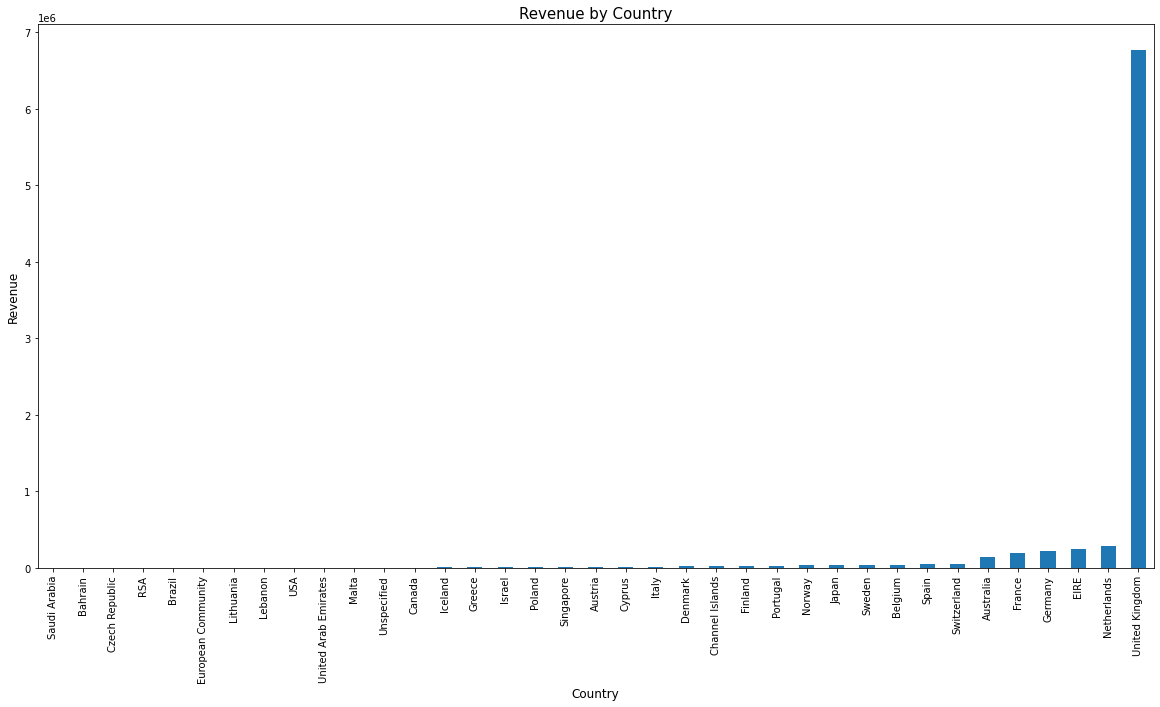

In [28]:
plot = rev_by_countries.plot(kind='bar', figsize=(20, 10))
plot.set_xlabel('Country', fontsize=12)
plot.set_ylabel('Revenue', fontsize=12)
plot.set_title('Revenue by Country', fontsize=15)
plot.set_xticklabels(labels=rev_by_countries.keys(), rotation=90)

In [30]:
# check percentage
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000066
Czech Republic          0.000085
RSA                     0.000121
Brazil                  0.000138
European Community      0.000156
Lithuania               0.000200
Lebanon                 0.000204
USA                     0.000209
United Arab Emirates    0.000229
Malta                   0.000302
Unspecified             0.000321
Canada                  0.000442
Iceland                 0.000519
Greece                  0.000568
Israel                  0.000843
Poland                  0.000869
Singapore               0.001099
Austria                 0.001223
Cyprus                  0.001560
Italy                   0.002035
Denmark                 0.002261
Channel Islands         0.002420
Finland                 0.002690
Portugal                0.003501
Norway                  0.004237
Japan                   0.004258
Sweden                  0.004409
Belgium                 0.004929
Spain                   0.006599
Sw

### 1-5. 월별 매출 구하기

In [31]:
retail['InvoiceDate'].sort_values(ascending=False)

406828   2011-12-09 12:50:00
406821   2011-12-09 12:50:00
406815   2011-12-09 12:50:00
406816   2011-12-09 12:50:00
406817   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [32]:
def extract_month(data):
    month=str(data.month)
    if data.month<10:
        month = '0' + month
    return str(data.year) + month

In [33]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

InvoiceDate
201012     554604.020
201101     475074.380
201102     436546.150
201103     579964.610
201104     426047.851
201105     648251.080
201106     608013.160
201107     574238.481
201108     616368.000
201109     931440.372
201110     974603.590
201111    1132407.740
201112     342506.380
Name: CheckoutPrice, dtype: float64

In [34]:
def plot_bar(df, xlabel, ylabel, title, titlesize=15, fontsize=12, rotation=90, figsize=(20, 10)):
    plot = df.plot(kind='bar', figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=fontsize)
    plot.set_ylabel(ylabel, fontsize=fontsize)
    plot.set_title(title, fontsize=titlesize)
    plot.set_xticklabels(labels=df.keys(), rotation=rotation)

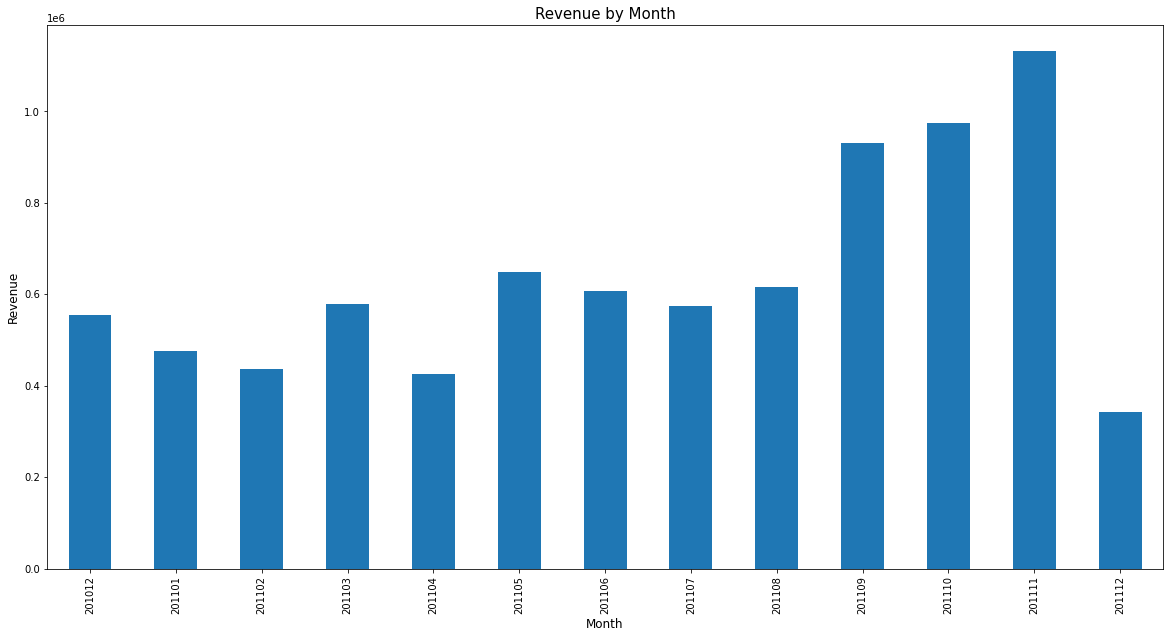

In [35]:
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

### 1-6. 요일별 매출 구하기

In [38]:
def extract_dow(date):
    return date.dayofweek

In [39]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(extract_dow).sum()['CheckoutPrice']
rev_by_dow

InvoiceDate
0    1274551.511
1    1563193.591
2    1530477.490
3    1906108.190
4    1241316.181
6     784418.851
Name: CheckoutPrice, dtype: float64

In [40]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

InvoiceDate
0    1274551.511
1    1563193.591
2    1530477.490
3    1906108.190
4    1241316.181
6     784418.851
Name: CheckoutPrice, dtype: float64

In [41]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
rev_by_dow

Mon     1274551.511
Tue     1563193.591
Wed     1530477.490
Thur    1906108.190
Fri     1241316.181
Sun      784418.851
Name: CheckoutPrice, dtype: float64

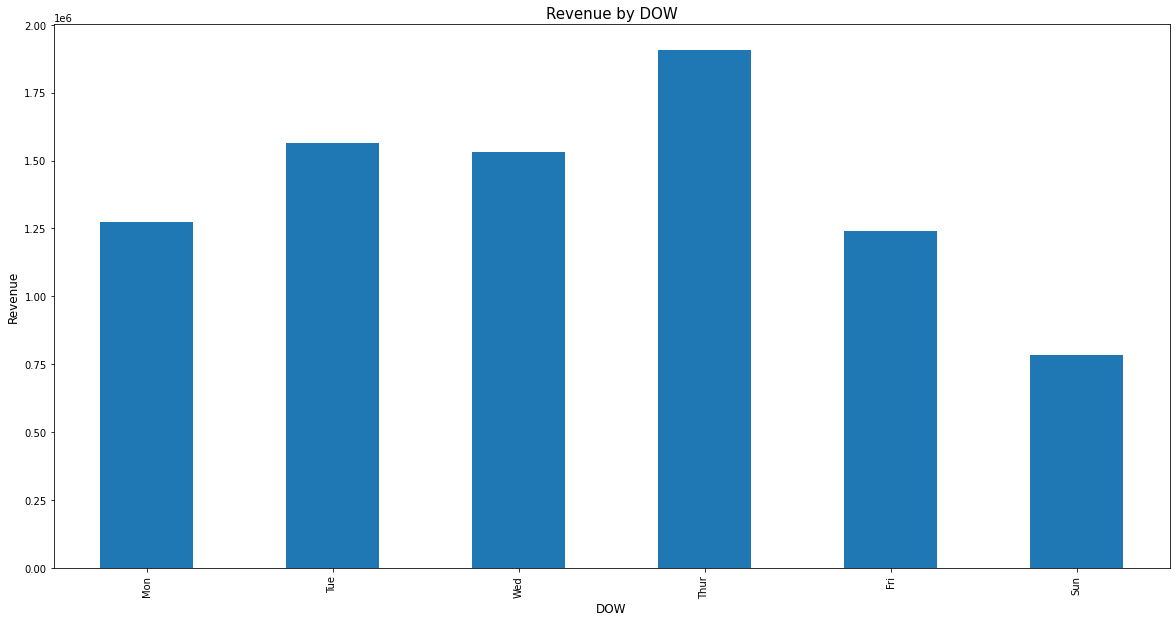

In [42]:
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

In [44]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
rev_by_hour

InvoiceDate
6        -497.350
7       31009.320
8      280103.270
9      655114.831
10    1150556.961
11    1054638.910
12    1337091.770
13    1122675.430
14     948603.821
15     898958.860
16     447390.890
17     212975.731
18     100734.560
19      44688.440
20      16020.370
Name: CheckoutPrice, dtype: float64

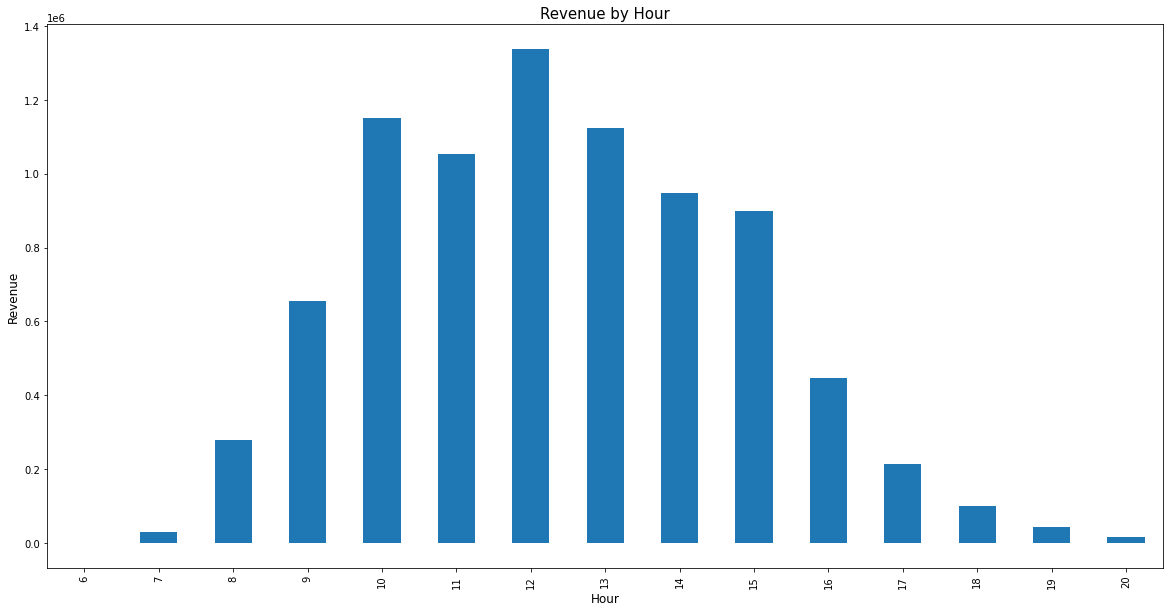

In [45]:
plot_bar(rev_by_hour, 'Hour', 'Revenue', 'Revenue by Hour')

# 2. 매출 데이터로부터 INSIGHT
* 전체 매출의 약 82%가 UK에서 발생
* 11년도에 가장 많은 매출이 발생한 달은 11월
    * 매출은 꾸준히 급성장하고 있음(11년도 12월은 9일까지만 포함)
* 일주일 중 목요일까지는 성장세, 이후로는 하락
* 새벽 6시에 주문이 시작, 오후 8시에 마감


# 3. 제품별 metrics

In [49]:
# Top 10 판매 제품
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling

StockCode
84077     53215
22197     48712
85099B    45066
84879     35314
85123A    34204
21212     33409
23084     27094
22492     25880
22616     25321
21977     24163
Name: Quantity, dtype: int32

In [50]:
# Top 10 매출 제품
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
22423     132870.40
85123A     93979.20
85099B     83236.76
47566      67687.53
POST       66710.24
84879      56499.22
23084      51137.80
22502      46980.95
79321      45936.81
22086      41500.48
Name: CheckoutPrice, dtype: float64

# 4. 우수 고객

In [54]:
# 구매 횟수 기준 Top 10
vip = retail.groupby('CustomerID').sum()['Quantity'].sort_values(ascending=False)[:10]
vip

CustomerID
14646    196719
12415     77242
14911     77180
17450     69029
18102     64122
17511     63012
13694     61803
14298     58021
14156     57025
16684     49390
Name: Quantity, dtype: int32

In [55]:
# 지불 금액 기준 Top 10
vvip = retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
vvip

CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
14156    113384.14
17511     88125.38
16684     65892.08
13694     62653.10
15311     59419.34
Name: CheckoutPrice, dtype: float64